# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [8]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

In [9]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [25]:
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])

In [26]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [27]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [38]:
sorted_rank =data.sort_values('Rank')

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [33]:
average_budget = round(data['USD_Production_Budget'].mean())
print(average_budget)

31113738


In [32]:
average_worldwide_gross = round(data['USD_Worldwide_Gross'].mean())
print(average_worldwide_gross)

88855422


In [35]:
minimum_gross_worldwide = data['USD_Worldwide_Gross'].min()
print(minimum_gross_worldwide) 
minimum_domestic_revenue = data['USD_Domestic_Gross'].min()
print(minimum_domestic_revenue)

0
0


In [68]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44","57,741,684.38"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00,"-175,000,000.00"
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50","-2,244,775.00"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00","8,122,000.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00","59,518,660.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27","140,972,329.93"


In [63]:
print(data['USD_Worldwide_Gross'].max())
print(data['USD_Production_Budget'].max())

2783918982
425000000


In [67]:
lowest_revenue = data['Profit'].tail(1)
highest_revenue = data['Profit'].head(1)
print(lowest_revenue)
print(highest_revenue)

5390   -20000000
Name: Profit, dtype: int64
0    10890000
Name: Profit, dtype: int64


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [71]:
zero_revenue = data[data['USD_Domestic_Gross'] == 0]
zero_revenue.sort_values('USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0,-1400
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000
...,...,...,...,...,...,...,...
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [72]:
zero_worldwide = data[data['USD_Worldwide_Gross'] == 0]
zero_worldwide.sort_values('USD_Worldwide_Gross')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
1,5140,1916-05-09,Intolerance,385907,0,0,-385907
4843,4956,2015-03-03,Ask Me Anything,950000,0,0,-950000
4842,4309,2015-03-03,To Write Love On Her Arms,3400000,0,0,-3400000
4841,5214,2015-03-02,UnDivided,250000,0,0,-250000
4840,4820,2015-03-02,Bleeding Hearts,1200000,0,0,-1200000
...,...,...,...,...,...,...,...
4046,5368,2011-11-25,The Ridges,17300,0,0,-17300
3998,3902,2011-10-05,The Hit List,6000000,0,0,-6000000
3978,4423,2011-09-13,Never Back Down 2: The Beatdown,3000000,0,0,-3000000
4218,4816,2012-08-28,Below Zero,1200000,0,0,-1200000


### Filtering on Multiple Conditions

In [75]:
international_releases = data.loc[(data['USD_Domestic_Gross']== 0) & (data['USD_Worldwide_Gross'] != 0)]
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [78]:
data.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,5100000
...,...,...,...,...,...,...,...
5378,914,2017-10-02,Fifty Shades Darker,55000000,376856949,114434010,321856949
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [88]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
data_clean = data.query('Release_Date < @scrape_date ')
unrealeased_count = data.query('Release_Date >= @scrape_date').shape[0]

In [93]:
data_clean.value_counts(ascending=False)

Rank  Release_Date  Movie_Title               USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  Profit     
1     2009-12-18    Avatar                    425000000              2783918982           760507625            2358918982    1
3594  1965-02-03    The Sound of Music        8200000                286214286            163214286            278014286     1
3602  1986-08-08    Stand by Me               8000000                52287414             52287414             44287414      1
3601  2010-09-17    Easy A                    8000000                76200721             58401464             68200721      1
3600  2006-07-26    Little Miss Sunshine      8000000                100642353            59891098             92642353      1
                                                                                                                            ..
1799  1998-05-15    Bulworth                  30000000               29203383             26528684            -79661

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [96]:
data_clean.describe()
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
(money_losing.shape[0]/data_clean.shape[0])*100

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

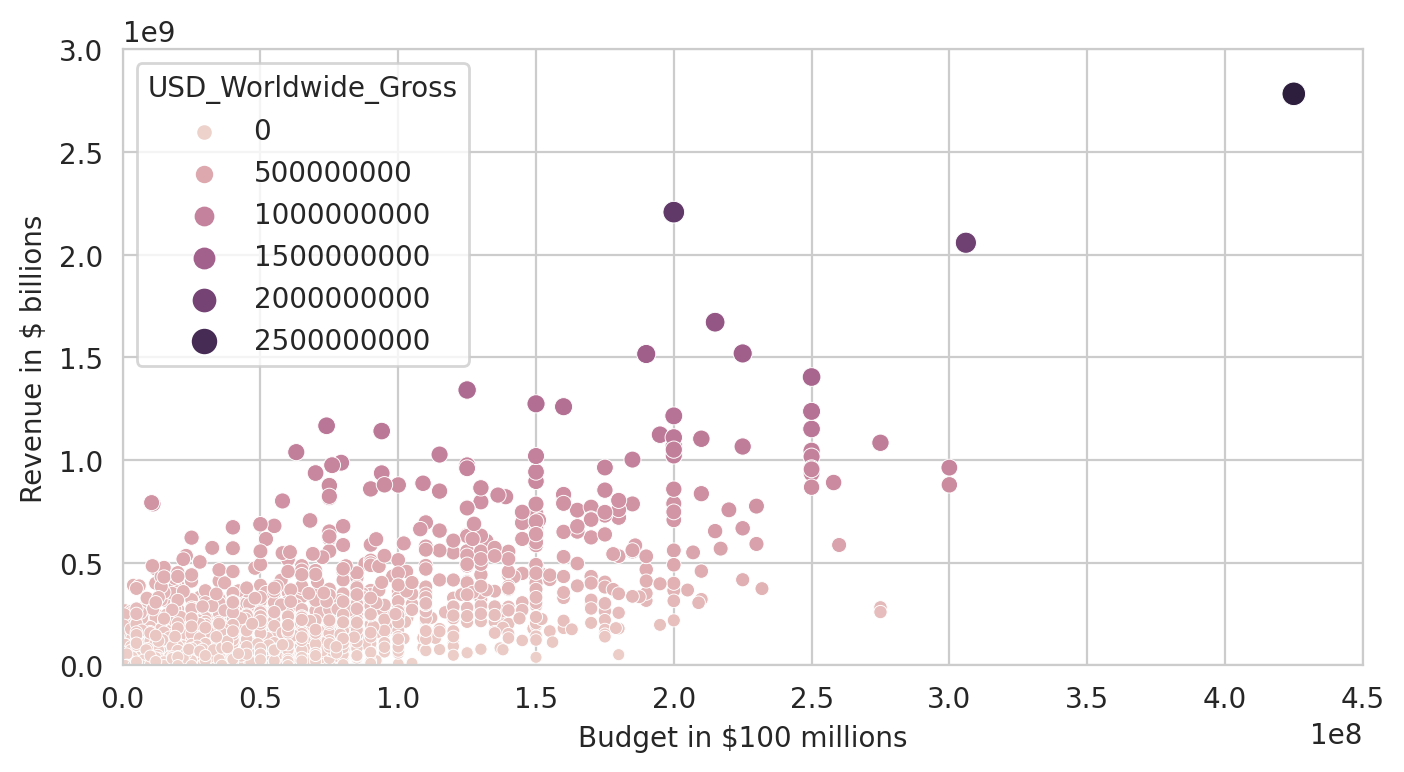

In [107]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('whitegrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



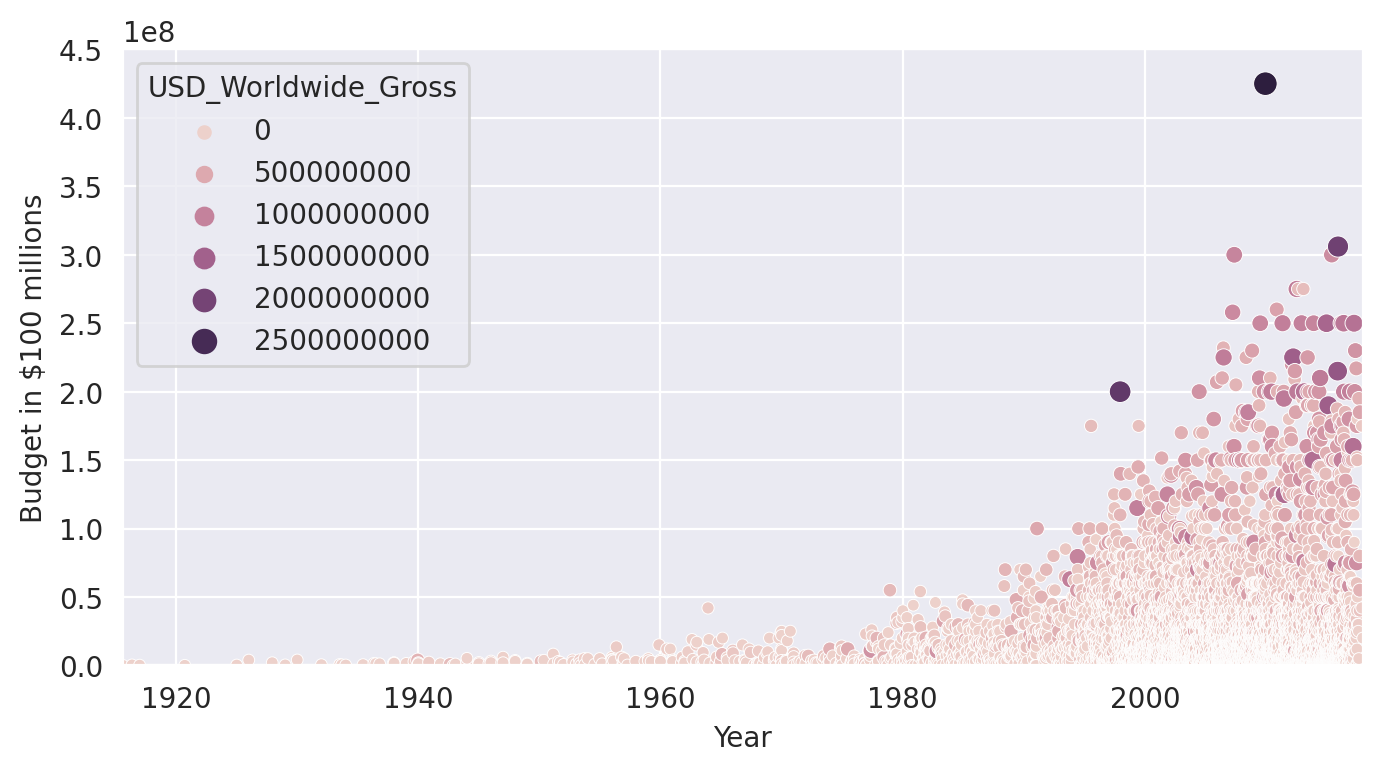

In [115]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [118]:
dt_index =  pd.DatetimeIndex(data_clean['Release_Date'])

In [119]:
years = dt_index.year

In [120]:
decades = years//10*10
data_clean['Decades'] = decades 

/var/folders/m3/wv858l6s3gq8qg2k9492mzd80000gp/T/ipykernel_25075/478974343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decades'] = decades


In [121]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [123]:
old_films = data_clean[data_clean.Decades <= 1960]
new_films = data_clean[data_clean.Decades > 1960]        

In [ ]:
old_films.sort_values('USD_Production_Budget',ascending=False)

# Seaborn Regression Plots

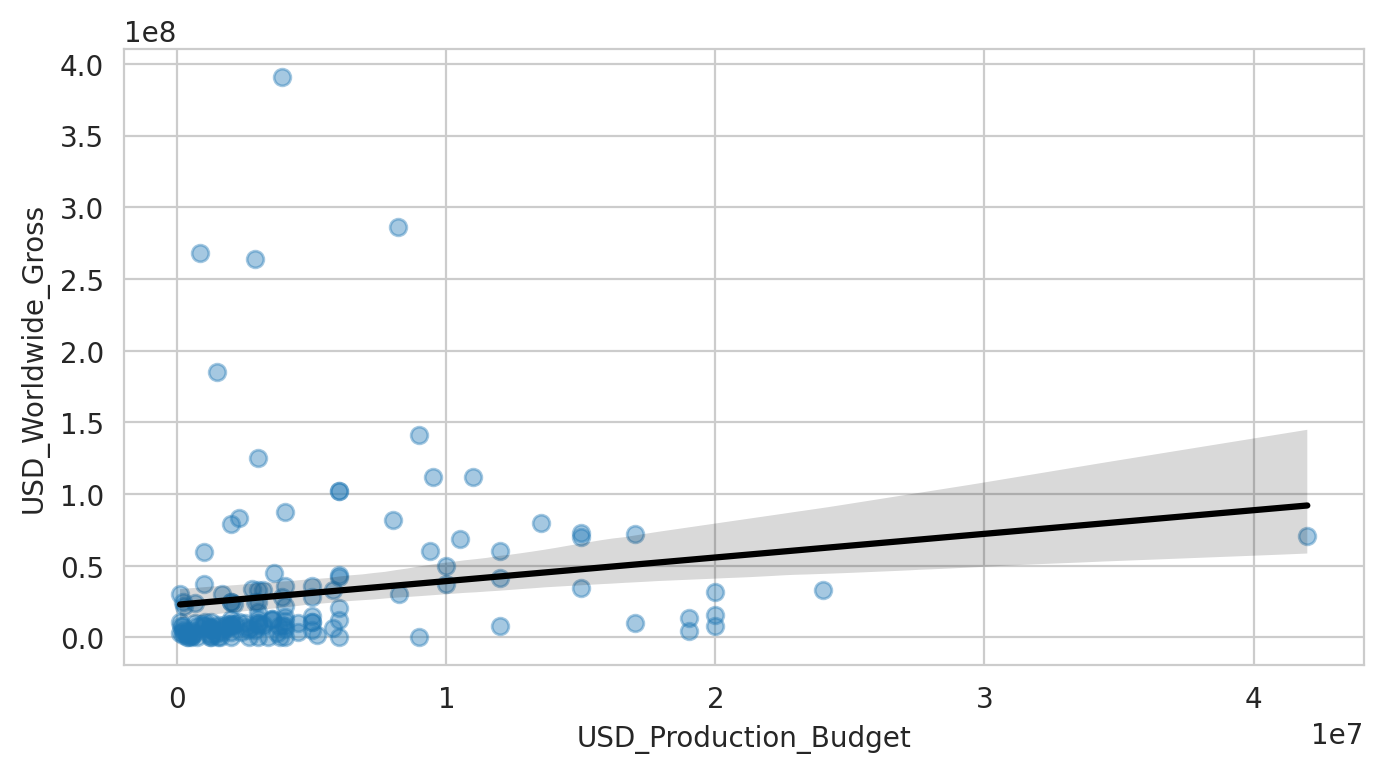

In [125]:
plt.figure(figsize=(8,4),dpi=200)

with sns.axes_style('whitegrid'):
    sns.regplot(data=old_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                scatter_kws={'alpha':0.4},
                line_kws= {'color':'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

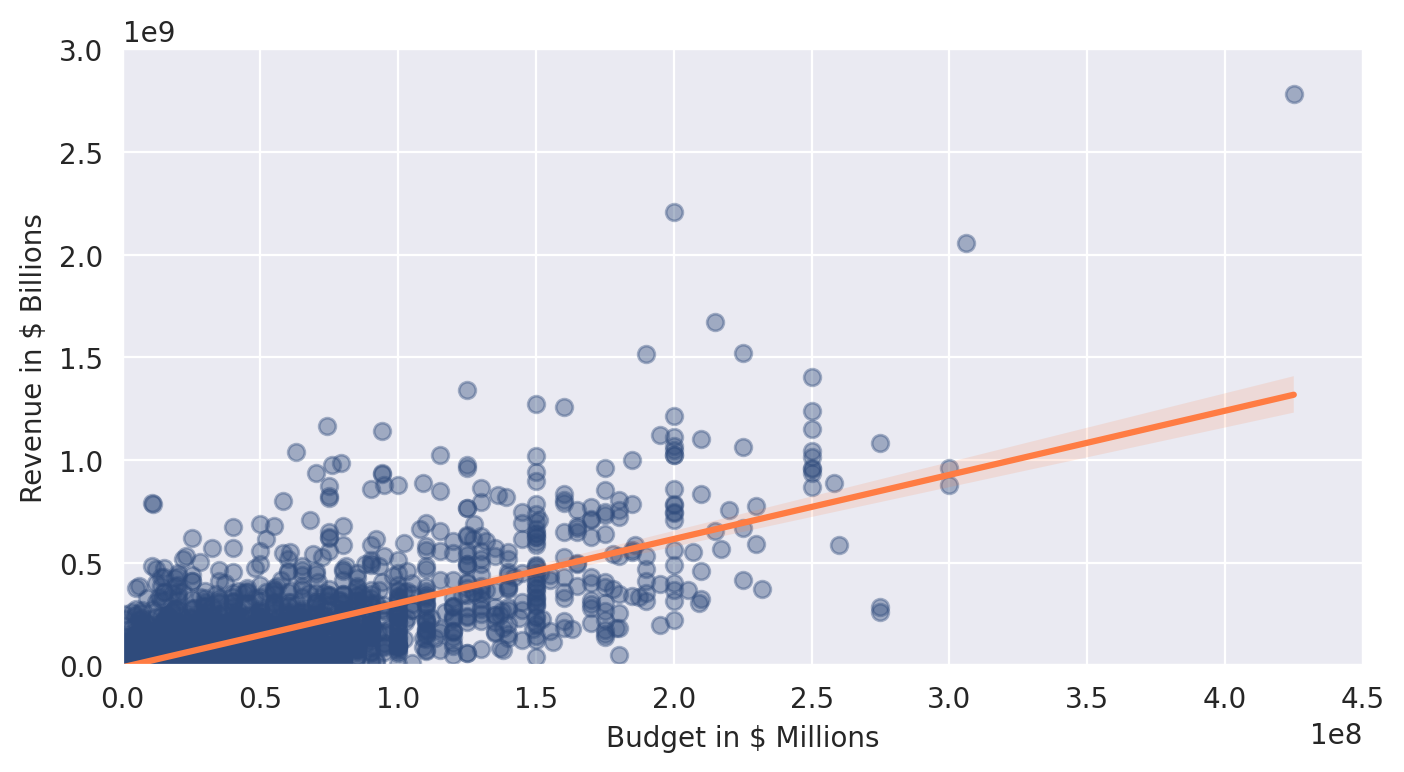

In [132]:
plt.figure(figsize=(8,4),dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                color='#2f4b7c',
                scatter_kws={'alpha':0.4},
                line_kws= {'color':"#ff7c43"})
    
    ax.set(xlim=(0,450000000),
           ylim =(0,3000000000),
           xlabel ='Budget in $ Millions',
           ylabel = 'Revenue in $ Billions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [134]:
regression = LinearRegression()

In [135]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

Y = pd.DataFrame(new_films , columns=['USD_Worldwide_Gross'])

In [136]:
regression.fit(X,Y)

LinearRegression()

In [137]:
regression.intercept_

array([-8650768.00661024])

In [138]:
regression.coef_

array([[3.12259592]])

In [139]:
regression.score(X,Y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [141]:
X2 = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

Y2 = pd.DataFrame(old_films , columns=['USD_Worldwide_Gross'])

In [142]:
regression.fit(X2,Y2)

LinearRegression()

In [147]:
theta_0 = regression.intercept_[0]
print(type(theta_0))

<class 'numpy.float64'>


In [144]:
theta_1 = regression.coef_[0]

array([[1.64771314]])

In [145]:
regression.score(X2,Y2)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [148]:
budget = 35000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]* budget  

In [150]:
revenue_estimate = round(revenue_estimate,-6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $80000000.0.
